In [1]:
% Multiple Linear Regression
% 2017-04-08 jkang
close all;clear;clc

% Make sure you are in the right path
cd('/Users/jaegukang/GoogleDrive/GitHub/useful_bits/Machine_Learning/Linear_Regression/Matlab')

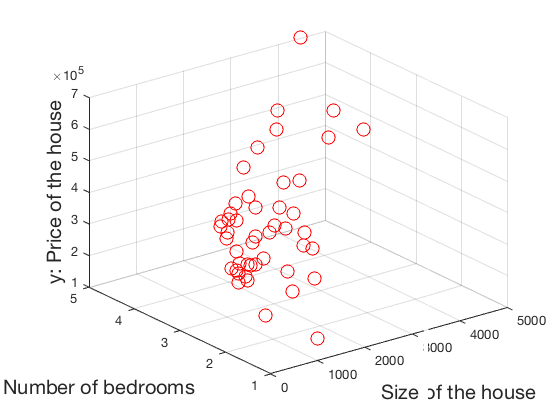

In [2]:
%% Load data and Preprocess
data = importdata('data.txt');
X = data(:,1:2); % col1: size of the house (square feet)
                 % col2: number of bedrooms
y = data(:,3);   % price of the house
n = length(y); % number of training examples

plot3(X(:,1),X(:,2),y,'ro','MarkerSize',10)
xlabel('Size of the house','FontSize',15)
ylabel('Number of bedrooms','FontSize',15)
zlabel('y: Price of the house','FontSize',15)
grid on
rotate3d on

% Normalize features
% z-score normalization
mu = mean(X,1)';
sigma = std(X,1)';
X_norm = (X - repmat(mu',size(X,1),1))./repmat(sigma',size(X,1),1);

% Add intercept term to X
X_norm = [ones(n,1),X_norm];

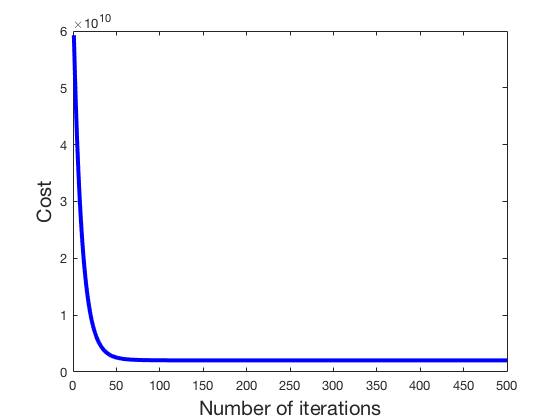

In [3]:
%% Learning
alpha = 0.05;
num_iter = 500;
theta = zeros(3,1);

J_history = zeros(num_iter, 1);
costFunction = @(X,y,theta,n) 1/(2*n)*(X*theta - y)'*(X*theta - y);
for iter = 1:num_iter
    theta = theta - alpha*(1/n)*X_norm'*(X_norm*theta - y); % update theta
    J_history(iter) = costFunction(X_norm,y,theta,n); % save cost history
end

figure;
plot(J_history,'-b','LineWidth',3)
xlabel('Number of iterations','FontSize',15)
ylabel('Cost','FontSize',15)


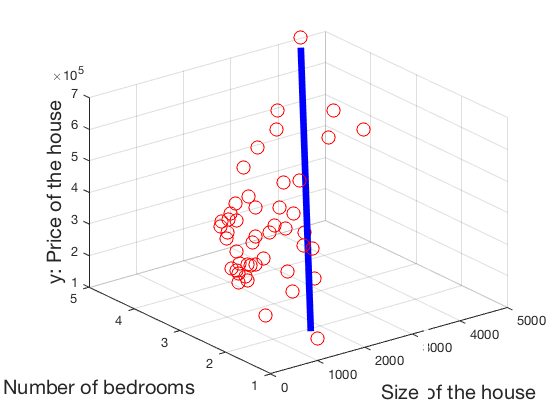

In [4]:
%% Prediction
testX(:,1) = linspace(min(X(:,1)),max(X(:,1)),length(X(:,1)));
testX(:,2) = linspace(min(X(:,2)),max(X(:,2)),length(X(:,2)));

testX_norm = (testX - mu')./sigma';
testX_norm = [ones(size(testX,1),1), testX_norm];
testY = testX_norm*theta;

figure;
plot3(X(:,1),X(:,2),y,'ro','MarkerSize',10); hold on
plot3(testX(:,1),testX(:,2),testY,'b-','LineWidth',5); hold off
xlabel('Size of the house','FontSize',15)
ylabel('Number of bedrooms','FontSize',15)
zlabel('y: Price of the house','FontSize',15)
grid on
rotate3d on